# Setup

In [43]:
# https://openalex.org/

from pyalex import Works, Authors, Sources, Institutions, Concepts, Publishers, Funders
import pyalex
pyalex.config.email = "maximilian.noichl@uni-bamberg.de"

from itertools import chain
import tqdm.auto as tqdm
import pandas as pd
from compress_pickle import dump, load
import networkx as nx
import json



# Get Perceptron Data

In [41]:
query = Works().search(['Perceptron']).filter(publication_year="<1979")
records= []
for record in chain(*query.paginate(per_page=200,n_max=None)):
    records.append(record)
    #print(len(records))



In [42]:
df = pd.DataFrame(records)
print(len(df))
print(df.columns)
print(df['authorships'][0])
print(df['referenced_works'][0])

701
Index(['id', 'doi', 'title', 'display_name', 'relevance_score',
       'publication_year', 'publication_date', 'ids', 'language',
       'primary_location', 'type', 'type_crossref', 'indexed_in',
       'open_access', 'authorships', 'countries_distinct_count',
       'institutions_distinct_count', 'corresponding_author_ids',
       'corresponding_institution_ids', 'apc_list', 'apc_paid', 'has_fulltext',
       'fulltext_origin', 'cited_by_count', 'cited_by_percentile_year',
       'biblio', 'is_retracted', 'is_paratext', 'primary_topic', 'topics',
       'keywords', 'concepts', 'mesh', 'locations_count', 'locations',
       'best_oa_location', 'sustainable_development_goals', 'grants',
       'datasets', 'versions', 'referenced_works_count', 'referenced_works',
       'related_works', 'ngrams_url', 'abstract_inverted_index',
       'cited_by_api_url', 'counts_by_year', 'updated_date', 'created_date'],
      dtype='object')
[{'author_position': 'first', 'author': {'id': 'https://ope

# Network of Articles

In [44]:
# Create a directed graph
G = nx.DiGraph()

# Add nodes and edges
for ix,item in df.iterrows():
    G.add_node(item["id"])  # Add each work as a node
    for related in item["related_works"]:
        G.add_edge(item["id"], related)  # Create an edge from this work to each related work

# Optionally, you can print the nodes and edges to verify
print("Nodes in the network:")
print(len(G.nodes()))
print("Edges in the network:")
print(len(G.edges()))

Nodes in the network:
4961
Edges in the network:
7221


# Network of Authors

In [ ]:
# Create a directed graph
G = nx.DiGraph()

# Add nodes and edges
for ix,item in df.iterrows():
    authors = []
    for au in item['authorships']:
        aut_id = au['author']['id']
        G.add_node(aut_id)
        aurhors.append(aut_id)
    ref_articles_list = item['referenced_works']
    ref_authos_series = pd.DataFrame(Works()[ref_articles_list])['authorships']
    referenced_authors = []
    for ref_au in ref_authos_series:
        ref_aut_id = ref_au['author']['id']
        G.add_node(ref_aut_id)
        referenced_authors.append(aut_id)
    

In [45]:
# Need to generate a network of authors.
referenced_list = df['referenced_works'][0]
print(referenced_list)
# Create a query with the specified search terms
query1 = Works().search(referenced_list)

['https://openalex.org/W1570445666', 'https://openalex.org/W1995341919', 'https://openalex.org/W2042559059', 'https://openalex.org/W2043486465', 'https://openalex.org/W2065389787', 'https://openalex.org/W2078200762', 'https://openalex.org/W2126451342', 'https://openalex.org/W22297218', 'https://openalex.org/W2319567444', 'https://openalex.org/W2476597994', 'https://openalex.org/W2495102332', 'https://openalex.org/W2495558415', 'https://openalex.org/W2497735908', 'https://openalex.org/W3027165077', 'https://openalex.org/W3203988787']


In [55]:
ref_authos_series = pd.DataFrame(Works()[referenced_list])['authorships']
for refaut in ref_authos_series:
    print(refaut)

[{'author_position': 'first', 'author': {'id': 'https://openalex.org/A5081639634', 'display_name': 'Warren S. McCulloch', 'orcid': None}, 'institutions': [{'id': 'https://openalex.org/I16820183', 'display_name': 'Illinois College', 'ror': 'https://ror.org/02ys5x139', 'country_code': 'US', 'type': 'education', 'lineage': ['https://openalex.org/I16820183']}, {'id': 'https://openalex.org/I157725225', 'display_name': 'University of Illinois Urbana-Champaign', 'ror': 'https://ror.org/047426m28', 'country_code': 'US', 'type': 'education', 'lineage': ['https://openalex.org/I157725225']}], 'countries': ['US'], 'is_corresponding': False, 'raw_author_name': 'Warren S. McCulloch', 'raw_affiliation_strings': ['College of Medicine, Department of Psychiatry at the Illinois Neuropsychiatric Institute, University of Illinois, Illinois, USA']}, {'author_position': 'last', 'author': {'id': 'https://openalex.org/A5046307815', 'display_name': 'Walter Pitts', 'orcid': None}, 'institutions': [{'id': 'https:

In [48]:
records= []
for record in chain(*query1.paginate(per_page=200,n_max=None)):
    records.append(record)
    
df = pd.DataFrame(records)
print(len(df))
df.head()

0


""


In [38]:
aver = Works()[referenced_list]
df = pd.DataFrame(aver)
print(len(df))
df.head()

14


,id,doi,title,display_name,publication_year,publication_date,ids,language,primary_location,type,...,versions,referenced_works_count,referenced_works,related_works,ngrams_url,abstract_inverted_index,cited_by_api_url,counts_by_year,updated_date,created_date
0,https://openalex.org/W1995341919,https://doi.org/10.1007/bf02478259,A logical calculus of the ideas immanent in ne...,A logical calculus of the ideas immanent in ne...,1943,1943-12-01,{'openalex': 'https://openalex.org/W1995341919...,en,"{'is_oa': False, 'landing_page_url': 'https://...",article,...,[],1,[https://openalex.org/W1976549967],"[https://openalex.org/W4283810044, https://ope...",https://api.openalex.org/works/W1995341919/ngrams,None,https://api.openalex.org/works?filter=cites:W1...,"[{'year': 2024, 'cited_by_count': 445}, {'year...",2024-06-01T09:12:27.218168,2016-06-24
1,https://openalex.org/W22297218,None,The organization of behavior,The organization of behavior,1988,1988-01-01,"{'openalex': 'https://openalex.org/W22297218',...",en,"{'is_oa': False, 'landing_page_url': 'http://d...",book,...,[],0,[],"[https://openalex.org/W3207342693, https://ope...",https://api.openalex.org/works/W22297218/ngrams,None,https://api.openalex.org/works?filter=cites:W2...,"[{'year': 2023, 'cited_by_count': 2}, {'year':...",2024-05-31T00:37:18.564379,2016-06-24
2,https://openalex.org/W1570445666,https://doi.org/10.1515/9781400882618-002,Representation of Events in Nerve Nets and Fin...,Representation of Events in Nerve Nets and Fin...,1956,1956-12-31,{'openalex': 'https://openalex.org/W1570445666...,en,"{'is_oa': False, 'landing_page_url': 'https://...",book-chapter,...,[],0,[],"[https://openalex.org/W2748952813, https://ope...",https://api.openalex.org/works/W1570445666/ngrams,"{'An': [0], 'elementary': [1], 'exposition': [...",https://api.openalex.org/works?filter=cites:W1...,"[{'year': 2024, 'cited_by_count': 14}, {'year'...",2024-05-26T00:44:39.624426,2016-06-24
3,https://openalex.org/W2497735908,None,Probabilistic Logic and the Synthesis of Relia...,Probabilistic Logic and the Synthesis of Relia...,1956,1956-01-01,{'openalex': 'https://openalex.org/W2497735908...,en,"{'is_oa': False, 'landing_page_url': 'https://...",article,...,[],2,"[https://openalex.org/W1995341919, https://ope...","[https://openalex.org/W2169213530, https://ope...",https://api.openalex.org/works/W2497735908/ngrams,None,https://api.openalex.org/works?filter=cites:W2...,"[{'year': 2023, 'cited_by_count': 2}, {'year':...",2024-05-16T20:00:37.921933,2016-08-23
4,https://openalex.org/W2126451342,None,Design for a Brain,Design for a Brain,1952,1952-01-01,{'openalex': 'https://openalex.org/W2126451342...,en,"{'is_oa': False, 'landing_page_url': 'http://c...",book,...,[],0,[],"[https://openalex.org/W3207342693, https://ope...",https://api.openalex.org/works/W2126451342/ngrams,"{'Brain.': [0], 'By': [1], 'W.': [2], 'Ross': ...",https://api.openalex.org/works?filter=cites:W2...,"[{'year': 2022, 'cited_by_count': 1}, {'year':...",2024-05-21T06:10:47.407532,2016-06-24


KeyboardInterrupt: 

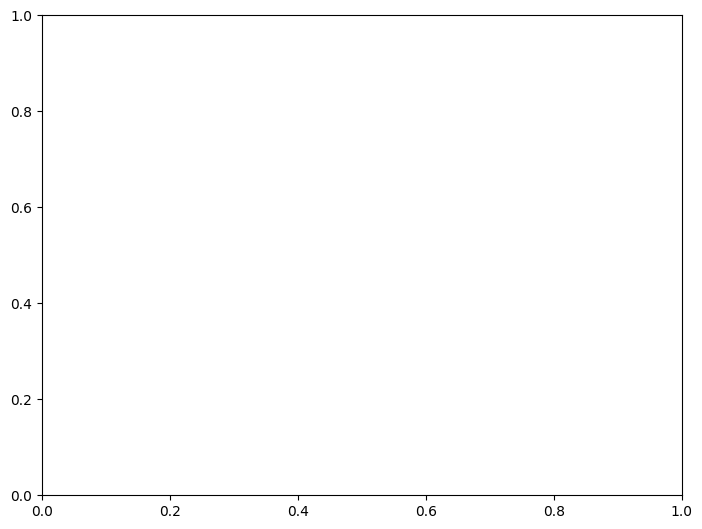

In [39]:
# If you need to visualize the network
import matplotlib.pyplot as plt

nx.draw(G, with_labels=True)
plt.show()